In [1]:
import pandas as pd
import numpy as np

# Data

In [2]:
bankloan= pd.read_csv('bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


# Data splitting

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score,roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
X=bankloan[['employ','debtinc','creddebt','othdebt']]
y= bankloan['default']

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify= y, random_state=2020)

In [6]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [7]:
y_pred= model.predict(X_test)

In [8]:
confusion_matrix(y_test,y_pred)

array([[120,   9],
       [ 31,  15]], dtype=int64)

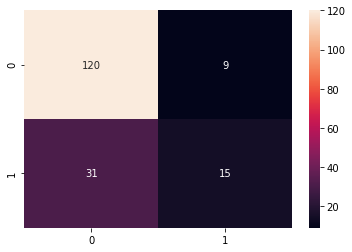

In [9]:

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       129
           1       0.62      0.33      0.43        46

    accuracy                           0.77       175
   macro avg       0.71      0.63      0.64       175
weighted avg       0.75      0.77      0.74       175



In [11]:
precision_score(y_test,y_pred) # default nilai kelas 1

0.625

In [12]:
recall_score(y_test,y_pred, pos_label=0) # untuk mengeluarkan nilai kelas 0, pakai parameter pos_label

0.9302325581395349

In [13]:
roc_auc_score(y_test,y_pred)

0.6281597573306371

In [14]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

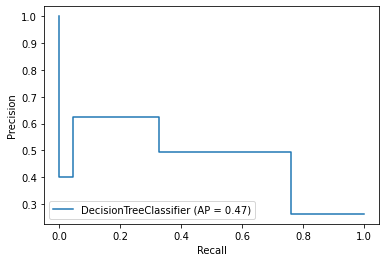

In [15]:
plot_precision_recall_curve(model,X_test,y_test)

Precision Recall Curve is usually used in imbalance dataset prediction, to adjust you threshold of your model into the desired ratio between Precision and Recall.
Average precision (AP) summarizes such a plot as the weighted mean of precisions achieved at each threshold. 

In [16]:
# AP= average precision

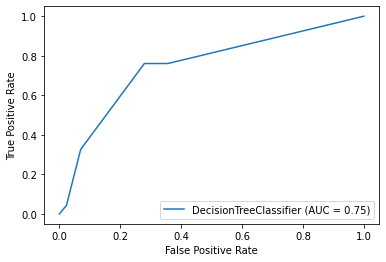

In [17]:
plot_roc_curve(model, X_test,y_test)

Further reading for ROC/AUC and Precision Recall curve:

https://acutecaretesting.org/en/articles/roc-curves-what-are-they-and-how-are-they-used#:~:text=ROC%20curves%20are%20frequently%20used,test(s)%20in%20question.  

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [18]:
bankloan= pd.read_csv('bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [19]:
bankloan['default'].value_counts()

0    517
1    183
Name: default, dtype: int64

# Data Splitting

In [22]:
X=bankloan[['employ', 'debtinc','creddebt','othdebt']]
y=bankloan['default']

In [23]:
X_train_val,X_test, y_train_val, y_test= train_test_split(X, y, stratify=y, test_size= 0.2, random_state=2020)

# Model selection: Benchmark

In [24]:
logreg= LogisticRegression()
tree= DecisionTreeClassifier(max_depth=3)
knn= KNeighborsClassifier()

## Cross validation; Metric Accuracy

In [26]:
skfold= StratifiedKFold(n_splits=5)

logreg_cv= cross_val_score(logreg, X_train_val,y_train_val, cv=skfold)
tree_cv= cross_val_score(tree, X_train_val, y_train_val, cv=skfold)
knn_cv= cross_val_score(knn, X_train_val,y_train_val, cv=skfold)

In [27]:
print('CV logreg', logreg_cv)
print('CV tree', tree_cv)
print('CV knn', knn_cv)

CV logreg [0.80357143 0.8125     0.83928571 0.79464286 0.78571429]
CV tree [0.83035714 0.78571429 0.83928571 0.75892857 0.77678571]
CV knn [0.75       0.71428571 0.75892857 0.77678571 0.71428571]


In [28]:
print('CV logreg', logreg_cv.mean())
print('CV tree', tree_cv.mean())
print('CV knn', knn_cv.mean())

CV logreg 0.8071428571428572
CV tree 0.7982142857142858
CV knn 0.7428571428571429


In [29]:
print('CV logreg', logreg_cv.std())
print('CV tree', tree_cv.std())
print('CV knn', knn_cv.std())

CV logreg 0.018385053823191087
CV tree 0.03123724229381413
CV knn 0.024872121923543065


Dalam Kasus Bank loan, kita ingin mengurangi pinjaman yang kita berikan ke orang yang salah; yaitu orang yang kita prediksi tidak default, ternyata default **(FN)**. Maka, metric evaluasi yang seharusnya kita pakai adalah ** Recall**

## Cross validation; Metric Recall

In [31]:
skfold= StratifiedKFold(n_splits=5)

logreg_cv= cross_val_score(logreg, X_train_val,y_train_val, cv=skfold, scoring='recall')
tree_cv= cross_val_score(tree, X_train_val, y_train_val, cv=skfold, scoring='recall')
knn_cv= cross_val_score(knn, X_train_val,y_train_val, cv=skfold, scoring='recall')

In [34]:
print('CV logreg', logreg_cv)
print('CV tree', tree_cv)
print('CV knn', knn_cv)

CV logreg [0.5        0.34482759 0.5862069  0.44827586 0.48275862]
CV tree [0.63333333 0.37931034 0.48275862 0.27586207 0.5862069 ]
CV knn [0.4        0.31034483 0.37931034 0.24137931 0.27586207]


In [32]:
print('CV logreg', logreg_cv.mean())
print('CV tree', tree_cv.mean())
print('CV knn', knn_cv.mean())

CV logreg 0.4724137931034482
CV tree 0.4714942528735633
CV knn 0.3213793103448276


In [33]:
print('CV logreg', logreg_cv.std())
print('CV tree', tree_cv.std())
print('CV knn', knn_cv.std())

CV logreg 0.0783297702869003
CV tree 0.13133741953400296
CV knn 0.06021759987018779


Berdasarkan metric Recall, model terbaik untuk dataset bankloan adalah logistic regresi

### Flexible metrics

In [38]:
def model_evaluation(model, metric):
    skfold= StratifiedKFold(n_splits=5)
    model_cv= cross_val_score(model, X_train_val, y_train_val,cv= skfold, scoring=metric)
    return model_cv

In [41]:
model_evaluation(logreg, 'f1')

array([0.57692308, 0.48780488, 0.65384615, 0.53061224, 0.53846154])

In [44]:
model_evaluation(logreg, 'f1').mean()

0.5575295784355018

In [45]:
model_evaluation(tree,'precision')

array([0.7037037 , 0.64705882, 0.82352941, 0.57142857, 0.56666667])

In [48]:
def print_result(model_cv):
    print('CV score', model_cv)
    print('CV score mean', model_cv.mean())
    print('CV score std', model_cv.std())

In [49]:
model_cv= model_evaluation(logreg, 'f1')
print_result(model_cv)

CV score [0.57692308 0.48780488 0.65384615 0.53061224 0.53846154]
CV score mean 0.5575295784355018
CV score std 0.05586171733783598


## Model Preformance in Test set

In [51]:
logreg= LogisticRegression()
logreg.fit(X_train_val, y_train_val)

LogisticRegression()

In [52]:
y_pred= logreg.predict(X_test)

In [53]:
print('recall', recall_score(y_test, y_pred))

recall 0.4594594594594595


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.77      0.46      0.58        37

    accuracy                           0.82       140
   macro avg       0.80      0.71      0.73       140
weighted avg       0.82      0.82      0.80       140



## hyperparameter Tunning with Grid search

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [91]:
X_train_val,X_test, y_train_val, y_test= train_test_split(X, y, stratify=y, test_size= 0.25, random_state=2020)

In [92]:
hyperparam_space= {
    'C': [1000, 500,100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'max_iter': [100,200, 300, 400, 500, 1000]
}

C memiliki 15 hyperparameter  
max iter memliki 6 hyperparameter  

cross validasi: 5 fold  

maka, proses tunning akan dijalankan sebanyak 15*6*5= 450 kali

In [93]:
skfold= StratifiedKFold(n_splits=5)
logreg= LogisticRegression()

grid_search = GridSearchCV(
     logreg, #model
     param_grid=hyperparam_space, #hyperparameter
     cv= skfold, #cross validasi
     scoring='f1', # metric evaluasi
     n_jobs=-1 #computer will use all cores (hardware)
)

In [94]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1')

In [95]:
print('best score', grid_search.best_score_)
print('best param', grid_search.best_params_)

best score 0.5635030045952634
best param {'C': 0.05, 'max_iter': 100}


In [96]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016359,0.001850,0.004188,0.000399,1000,100,"{'C': 1000, 'max_iter': 100}",0.723404,0.487805,0.533333,0.595745,0.425532,0.553164,0.101735,13
1,0.017950,0.001092,0.004793,0.001471,1000,200,"{'C': 1000, 'max_iter': 200}",0.723404,0.487805,0.533333,0.595745,0.425532,0.553164,0.101735,13
2,0.016755,0.001465,0.005387,0.001015,1000,300,"{'C': 1000, 'max_iter': 300}",0.723404,0.487805,0.533333,0.595745,0.425532,0.553164,0.101735,13
3,0.017952,0.003889,0.003790,0.000745,1000,400,"{'C': 1000, 'max_iter': 400}",0.723404,0.487805,0.533333,0.595745,0.425532,0.553164,0.101735,13
4,0.018548,0.007370,0.007185,0.003650,1000,500,"{'C': 1000, 'max_iter': 500}",0.723404,0.487805,0.533333,0.595745,0.425532,0.553164,0.101735,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.010571,0.000796,0.003590,0.000489,0.0001,200,"{'C': 0.0001, 'max_iter': 200}",0.000000,0.000000,0.000000,0.000000,0.068966,0.013793,0.027586,85
86,0.010372,0.000798,0.004991,0.002003,0.0001,300,"{'C': 0.0001, 'max_iter': 300}",0.000000,0.000000,0.000000,0.000000,0.068966,0.013793,0.027586,85
87,0.014774,0.002140,0.007102,0.002090,0.0001,400,"{'C': 0.0001, 'max_iter': 400}",0.000000,0.000000,0.000000,0.000000,0.068966,0.013793,0.027586,85
88,0.014570,0.003086,0.004190,0.001165,0.0001,500,"{'C': 0.0001, 'max_iter': 500}",0.000000,0.000000,0.000000,0.000000,0.068966,0.013793,0.027586,85


In [97]:
random= RandomizedSearchCV(logreg, param_distributions=hyperparam_space,cv= skfold, n_jobs=-1, scoring='f1')

In [98]:
random.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5,
                                              0.1, 0.05, 0.01, 0.005, 0.001,
                                              0.0005, 0.0001],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     1000]},
                   scoring='f1')

In [99]:
random.best_score_

0.5531638124891887

In [100]:
random.best_params_

{'max_iter': 100, 'C': 500}

## Final result Comparison: before vs after tunning

In [101]:
# before tunning:

logreg= LogisticRegression()
logreg.fit(X_train_val, y_train_val)
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       129
           1       0.79      0.41      0.54        46

    accuracy                           0.82       175
   macro avg       0.81      0.69      0.71       175
weighted avg       0.81      0.82      0.80       175



In [103]:
# After tunning

logreg_best=grid_search.best_estimator_
logreg_best.fit(X_train_val, y_train_val)
print(classification_report(y_test, logreg_best.predict(X_test)))


              precision    recall  f1-score   support

           0       0.81      0.95      0.88       129
           1       0.75      0.39      0.51        46

    accuracy                           0.81       175
   macro avg       0.78      0.67      0.70       175
weighted avg       0.80      0.81      0.78       175



Sebelum tunning, f1 score= 0.54, setelah tunning f1 score malah turun menjadi 0.51.  

Ini bisa terjadi karena :  

* peningkatkan dalam grid search sebenarnya tidak terlau signifikan
* pemilihan hyperparameter yang kita lakukan membuat model tidak stabil/ ovefitting

yang bisa kita lakukan:  

* coba pilih parameter lain  
* ganti modelnya  
* lakukan feature enginnering